In [10]:
# Load model directly
from transformers import AutoModel
model_jina = AutoModel.from_pretrained("jinaai/jina-embeddings-v3", trust_remote_code=True)

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

configuration_xlm_roberta.py:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- configuration_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_lora.py:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

modeling_xlm_roberta.py:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

embedding.py:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mlp.py:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


rotary.py:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


xlm_padding.py:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- xlm_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mha.py:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mha.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


block.py:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

stochastic_depth.py:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- block.py
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_xlm_roberta.py
- embedding.py
- mlp.py
- rotary.py
- xlm_padding.py
- mha.py
- block.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following fi

model.safetensors:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

Using device: cpu
Loaded SimLex-999 with 999 word pairs.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Converting GloVe format to word2vec format...


<ipython-input-12-e0a95bb67d8a>:83: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec('glove.6B.300d.txt', glove_path)


Loaded GloVe embeddings.
Total unique words: 1028
Computing BERT embeddings...


100%|██████████| 1028/1028 [01:42<00:00, 10.03it/s]


Computing RoBERTa embeddings...


100%|██████████| 1028/1028 [01:43<00:00,  9.96it/s]


Computing GloVe embeddings...


100%|██████████| 1028/1028 [00:00<00:00, 77368.46it/s]


Computing similarity scores...


100%|██████████| 999/999 [00:03<00:00, 290.22it/s]


BERT - Spearman's rank correlation: 0.1590, P-value: 0.0000
RoBERTa - Spearman's rank correlation: -0.0617, P-value: 0.0512
GloVe - Spearman's rank correlation: 0.3705, P-value: 0.0000


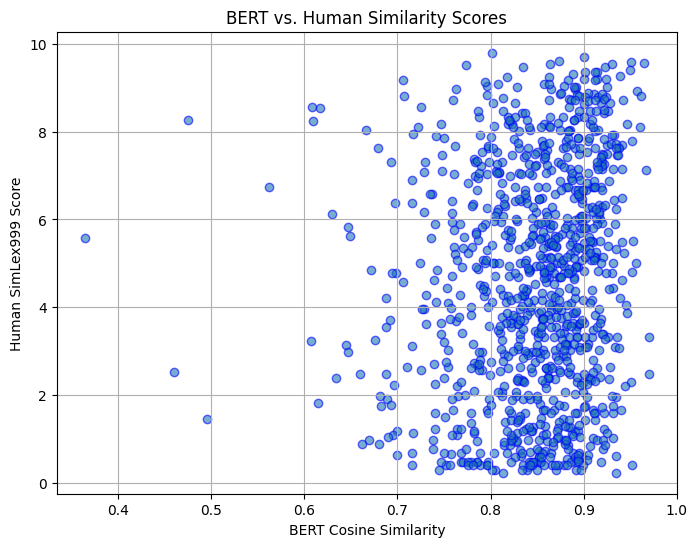

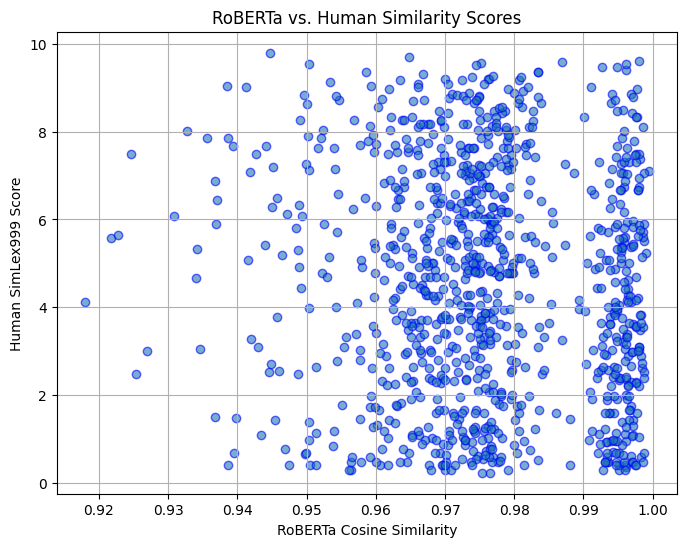

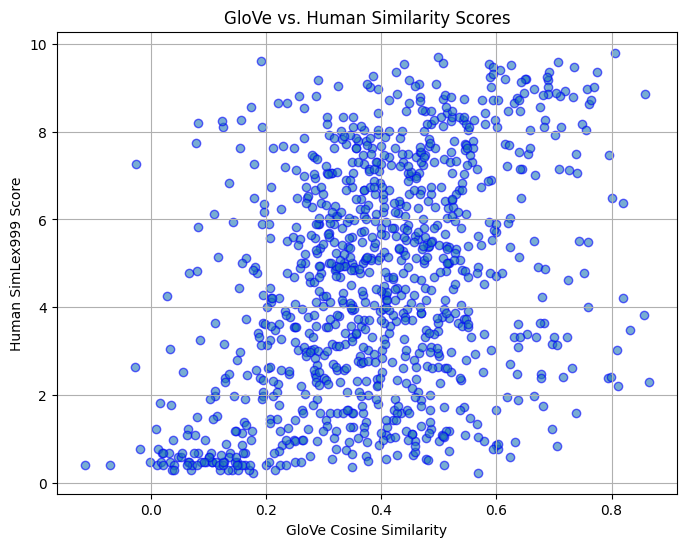

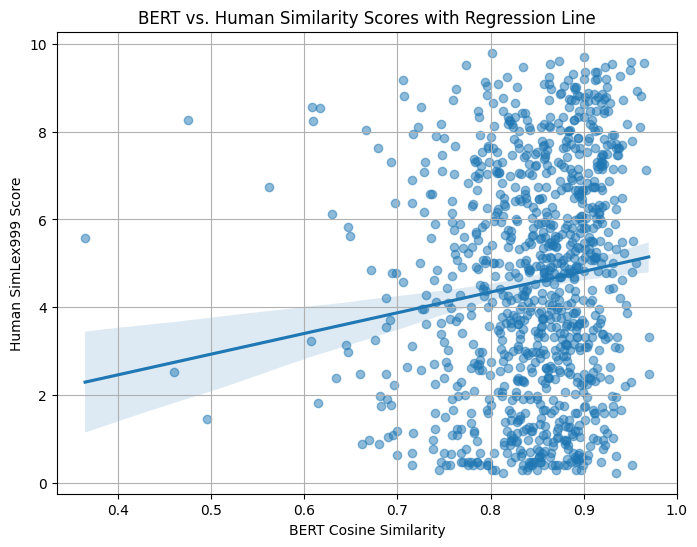

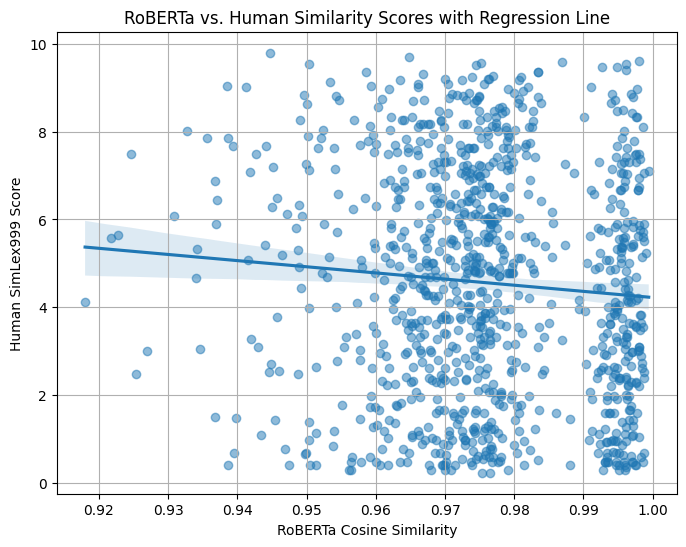

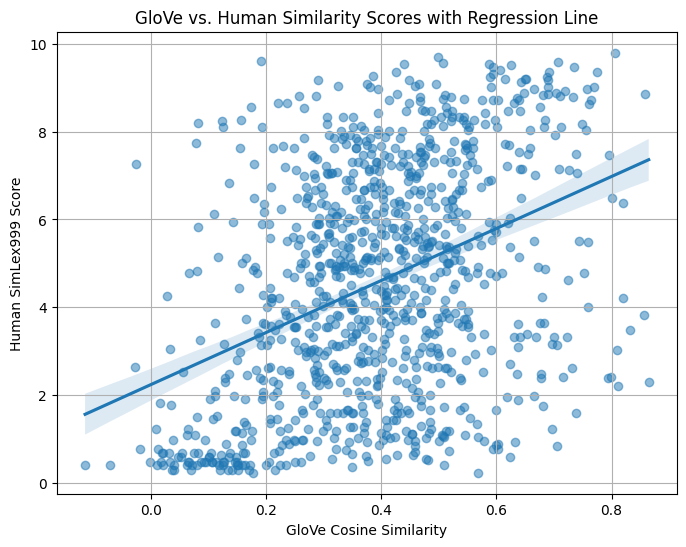


=== Benchmarking Results ===
BERT: Spearman Correlation = 0.1590, P-value = 0.0000
RoBERTa: Spearman Correlation = -0.0617, P-value = 0.0512
GloVe: Spearman Correlation = 0.3705, P-value = 0.0000


In [12]:
import os
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from gensim.models import KeyedVectors
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


np.random.seed(42)
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


def load_simlex(filepath):
    df = pd.read_csv(filepath, sep='\t')
    required_cols = {'word1', 'word2', 'SimLex999'}
    if not required_cols.issubset(set(df.columns)):
        raise ValueError(f"SimLex-999 file must contain columns: {required_cols}")
    df = df[['word1', 'word2', 'SimLex999']].dropna()
    return df

simlex_path = 'SimLex-999.txt'

print(f"Downloaded SimLex-999 to {simlex_path}")

simlex_df = load_simlex(simlex_path)
print(f"Loaded SimLex-999 with {len(simlex_df)} word pairs.")


# 2.1 BERT
bert_model_name = 'bert-base-uncased'
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
bert_model = AutoModel.from_pretrained(bert_model_name).to(device)
bert_model.eval()

# 2.2 RoBERTa
roberta_model_name = 'roberta-base'
roberta_tokenizer = AutoTokenizer.from_pretrained(roberta_model_name)
roberta_model = AutoModel.from_pretrained(roberta_model_name).to(device)
roberta_model.eval()

import requests
glove_path = 'glove.6B.300d.word2vec.txt'
if not os.path.exists(glove_path):
    glove_zip = 'glove.6B.zip'
    if not os.path.exists(glove_zip):
        print("Downloading GloVe embeddings...")
        glove_url = 'http://nlp.stanford.edu/data/glove.6B.zip'
        r = requests.get(glove_url, stream=True)
        with open(glove_zip, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024):
                if chunk:
                    f.write(chunk)
    import zipfile
    with zipfile.ZipFile(glove_zip, 'r') as zip_ref:
        zip_ref.extract('glove.6B.300d.txt', path='.')
    # Convert to word2vec format
    print("Converting GloVe format to word2vec format...")
    from gensim.scripts.glove2word2vec import glove2word2vec
    glove2word2vec('glove.6B.300d.txt', glove_path)

glove = KeyedVectors.load_word2vec_format(glove_path, binary=False)
print("Loaded GloVe embeddings.")

def get_bert_embedding(word, tokenizer, model):
    with torch.no_grad():
        inputs = tokenizer(word, return_tensors='pt').to(device)
        outputs = model(**inputs)
        # Get the embeddings from the last hidden state
        last_hidden = outputs.last_hidden_state.squeeze(0)  # (seq_len, hidden_size)
        # Average the token embeddings
        embedding = last_hidden.mean(dim=0).cpu().numpy()
    return embedding

def get_roberta_embedding(word, tokenizer, model):
    with torch.no_grad():
        inputs = tokenizer(word, return_tensors='pt').to(device)
        outputs = model(**inputs)
        last_hidden = outputs.last_hidden_state.squeeze(0)  # (seq_len, hidden_size)
        embedding = last_hidden.mean(dim=0).cpu().numpy()
    return embedding

def get_glove_embedding(word, model):
    if word in model:
        return model[word]
    else:
        # Handle OOV words by returning a zero vector
        return np.zeros(model.vector_size)

unique_words = set(simlex_df['word1']).union(set(simlex_df['word2']))
print(f"Total unique words: {len(unique_words)}")

# 4.1 BERT Embeddings
print("Computing BERT embeddings...")
bert_embeddings = {}
for word in tqdm(unique_words):
    bert_embeddings[word] = get_bert_embedding(word, bert_tokenizer, bert_model)

# 4.2 RoBERTa Embeddings
print("Computing RoBERTa embeddings...")
roberta_embeddings = {}
for word in tqdm(unique_words):
    roberta_embeddings[word] = get_roberta_embedding(word, roberta_tokenizer, roberta_model)

# 4.3 GloVe Embeddings
print("Computing GloVe embeddings...")
glove_embeddings = {}
for word in tqdm(unique_words):
    glove_embeddings[word] = get_glove_embedding(word, glove)


def compute_cosine_similarity(vec1, vec2):
    if np.all(vec1 == 0) or np.all(vec2 == 0):
        return 0.0
    return cosine_similarity([vec1], [vec2])[0][0]

# Initialize dictionaries to store similarities
similarity_scores = {
    'BERT': [],
    'RoBERTa': [],
    'GloVe': []
}

human_scores = simlex_df['SimLex999'].values


print("Computing similarity scores...")
for idx, row in tqdm(simlex_df.iterrows(), total=simlex_df.shape[0]):
    w1, w2, score = row['word1'], row['word2'], row['SimLex999']

    # BERT
    bert_sim = compute_cosine_similarity(bert_embeddings.get(w1, np.zeros(768)),
                                        bert_embeddings.get(w2, np.zeros(768)))
    similarity_scores['BERT'].append(bert_sim)

    # RoBERTa
    roberta_sim = compute_cosine_similarity(roberta_embeddings.get(w1, np.zeros(768)),
                                           roberta_embeddings.get(w2, np.zeros(768)))
    similarity_scores['RoBERTa'].append(roberta_sim)

    # GloVe
    glove_sim = compute_cosine_similarity(glove_embeddings.get(w1, np.zeros(300)),
                                         glove_embeddings.get(w2, np.zeros(300)))
    similarity_scores['GloVe'].append(glove_sim)


results = {}
for model_name, sims in similarity_scores.items():
    corr, p_val = spearmanr(sims, human_scores)
    results[model_name] = {'Spearman Correlation': corr, 'P-value': p_val}
    print(f"{model_name} - Spearman's rank correlation: {corr:.4f}, P-value: {p_val:.4f}")

# Convert similarity scores to DataFrame for easier plotting
similarity_df = pd.DataFrame(similarity_scores)
similarity_df['Human_Score'] = human_scores


for model_name in ['BERT', 'RoBERTa', 'GloVe']:
    plt.figure(figsize=(8, 6))
    plt.scatter(similarity_df[model_name], similarity_df['Human_Score'], alpha=0.6, edgecolors='b')
    plt.xlabel(f'{model_name} Cosine Similarity')
    plt.ylabel('Human SimLex999 Score')
    plt.title(f'{model_name} vs. Human Similarity Scores')
    plt.grid(True)
    plt.show()

for model_name in ['BERT', 'RoBERTa', 'GloVe']:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=model_name, y='Human_Score', data=similarity_df, scatter_kws={'alpha':0.5})
    plt.xlabel(f'{model_name} Cosine Similarity')
    plt.ylabel('Human SimLex999 Score')
    plt.title(f'{model_name} vs. Human Similarity Scores with Regression Line')
    plt.grid(True)
    plt.show()

print("\n=== Benchmarking Results ===")
for model_name, metrics in results.items():
    print(f"{model_name}: Spearman Correlation = {metrics['Spearman Correlation']:.4f}, P-value = {metrics['P-value']:.4f}")



In [17]:
os.environ['OPENAI_API_KEY'] = 'Your - Openai - Key'

In [18]:
from openai import OpenAI
client = OpenAI()

response = client.embeddings.create(
    input="random text test test",
    model="text-embedding-3-small"
)

print(response.data[0].embedding)

[0.005132982973009348, 0.017242904752492905, -0.018698474392294884, -0.01855851523578167, -0.047250036150217056, -0.03028704971075058, 0.027669822797179222, 0.003614431945607066, 0.011217685416340828, 0.006434598471969366, -0.0016865016659721732, 0.01581532694399357, -0.0012849952327087522, -0.00785867776721716, 0.05990229919552803, 0.050357118248939514, -0.02754385955631733, 0.00991606991738081, -0.040392063558101654, 0.04999322444200516, -0.0003859796852339059, 0.030231066048145294, -0.013729942962527275, 0.032974254339933395, 0.01731288433074951, 0.01680903322994709, -0.0017661030869930983, 0.020391974598169327, 0.040811941027641296, -0.03770485892891884, -0.02617226541042328, -0.0500212162733078, 0.024184852838516235, -0.05519968643784523, -0.03224647045135498, 0.04232349246740341, 0.06466089189052582, 0.014695657417178154, -0.015619384124875069, -0.04134378209710121, 0.02218344435095787, 0.007361824624240398, 0.04495471343398094, 0.007074909284710884, -0.024072885513305664, 0.0523

Loaded SimLex-999 dataset successfully.
Extracted 1028 unique words from SimLex-999.

Evaluating model: text-embedding-3-small
Generated embeddings for 1028 words using model: text-embedding-3-small

Total word pairs in SimLex-999: 999
Word pairs with missing embeddings skipped: 0
Word pairs used for evaluation: 999
Spearman's rank correlation: 0.5015 (p-value: 9.4553e-65)


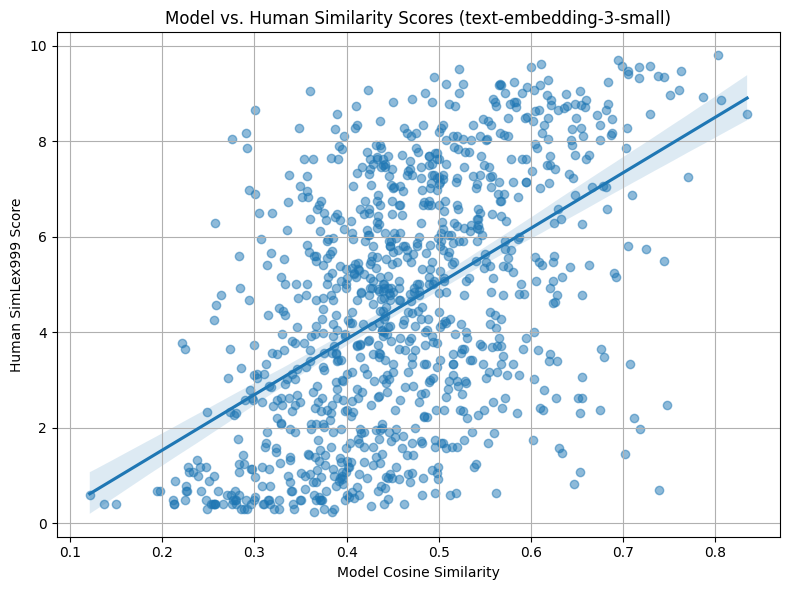


Evaluating model: text-embedding-3-large
Generated embeddings for 1028 words using model: text-embedding-3-large

Total word pairs in SimLex-999: 999
Word pairs with missing embeddings skipped: 0
Word pairs used for evaluation: 999
Spearman's rank correlation: 0.5659 (p-value: 1.1895e-85)


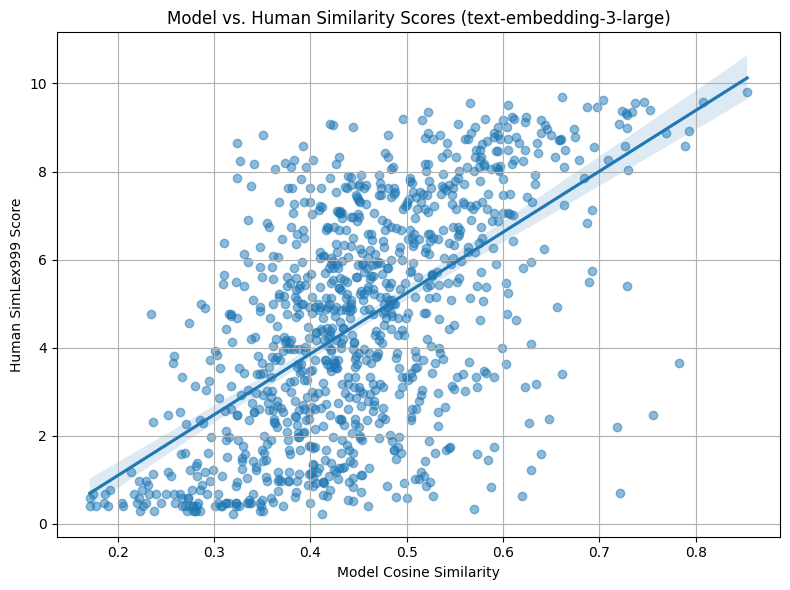


Evaluating model: text-embedding-ada-002
Generated embeddings for 1028 words using model: text-embedding-ada-002

Total word pairs in SimLex-999: 999
Word pairs with missing embeddings skipped: 0
Word pairs used for evaluation: 999
Spearman's rank correlation: 0.4390 (p-value: 2.5412e-48)


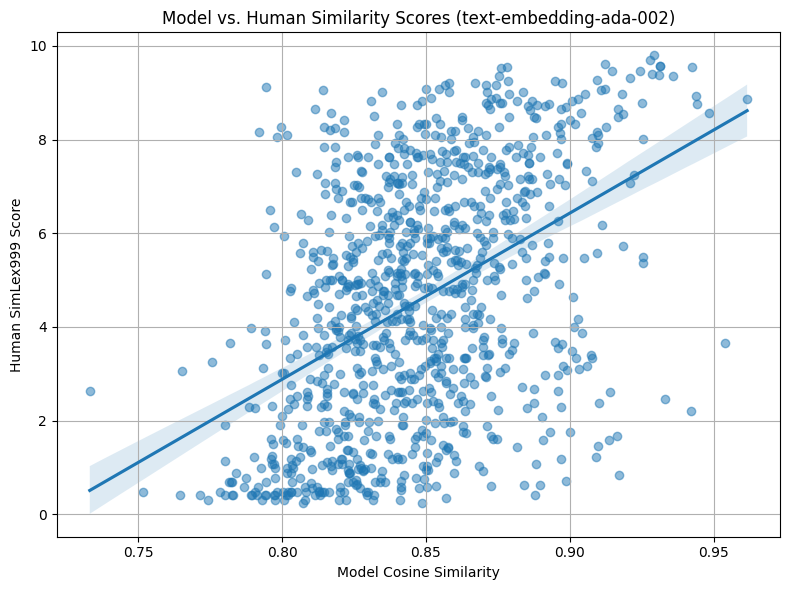


--- Evaluation Results ---
                    Model  Spearman_Correlation       P_Value
0  text-embedding-3-small              0.501532  9.455271e-65
1  text-embedding-3-large              0.565905  1.189464e-85
2  text-embedding-ada-002              0.439019  2.541172e-48


<ipython-input-27-99a639825a29>:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Spearman_Correlation', data=results_df, palette='viridis')


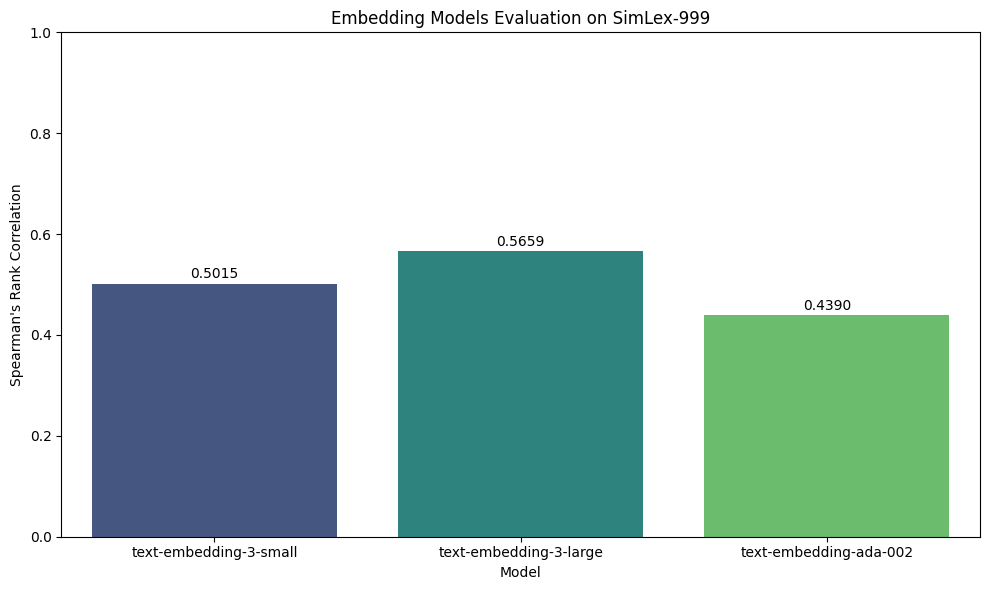

In [27]:
simlex_path = 'SimLex-999.txt' 

# Embedding models to evaluate
embedding_models = [
    "text-embedding-3-small",
    "text-embedding-3-large",
    "text-embedding-ada-002"
]

def load_simlex(simlex_path):
    simlex_df = pd.read_csv(simlex_path, sep='\t')
    print("Loaded SimLex-999 dataset successfully.")
    return simlex_df

def extract_unique_words(simlex_df):
    words = set(simlex_df['word1'].str.lower()).union(set(simlex_df['word2'].str.lower()))
    print(f"Extracted {len(words)} unique words from SimLex-999.")
    return list(words)

def get_embeddings(model, words):
    word_embeddings = {}
    for word in words:
        response = client.embeddings.create(
            input=word,
            model=model
        )
        embedding = response.data[0].embedding
        word_embeddings[word] = embedding
    return word_embeddings

def evaluate_embeddings(simlex_df, word_embeddings):
    human_scores = []
    model_similarities = []
    missing_pairs = 0

    for index, row in simlex_df.iterrows():
        word1 = row['word1'].lower()
        word2 = row['word2'].lower()
        human_score = row['SimLex999']

        emb1 = word_embeddings.get(word1)
        emb2 = word_embeddings.get(word2)

        if emb1 is None or emb2 is None:
            missing_pairs += 1
            continue  # Skip pairs with missing embeddings

        # Compute cosine similarity
        cosine_sim = cosine_similarity([emb1], [emb2])[0][0]

        # Append to lists
        human_scores.append(human_score)
        model_similarities.append(cosine_sim)

    total_pairs = len(simlex_df)
    used_pairs = len(human_scores)

    print(f"\nTotal word pairs in SimLex-999: {total_pairs}")
    print(f"Word pairs with missing embeddings skipped: {missing_pairs}")
    print(f"Word pairs used for evaluation: {used_pairs}")

    # Calculate Spearman's rank correlation
    spearman_corr, spearman_p = spearmanr(human_scores, model_similarities)
    print(f"Spearman's rank correlation: {spearman_corr:.4f} (p-value: {spearman_p:.4e})")

    return spearman_corr, spearman_p, human_scores, model_similarities

def main():
    simlex_df = load_simlex(simlex_path)

    unique_words = extract_unique_words(simlex_df)
    evaluation_results = []
    for model in embedding_models:
        print(f"\nEvaluating model: {model}")
        # Generate embeddings for all unique words
        word_embeddings = get_embeddings(model, unique_words)
        print(f"Generated embeddings for {len(word_embeddings)} words using model: {model}")

        # Evaluate embeddings
        spearman_corr, spearman_p, human_scores, model_similarities = evaluate_embeddings(simlex_df, word_embeddings)

        # Store results
        evaluation_results.append({
            'Model': model,
            'Spearman_Correlation': spearman_corr,
            'P_Value': spearman_p
        })

        # Plotting for each model
        plot_df = pd.DataFrame({
            'Model_Similarity': model_similarities,
            'Human_Score': human_scores
        })
        plt.figure(figsize=(8, 6))
        sns.regplot(x='Model_Similarity', y='Human_Score', data=plot_df, scatter_kws={'alpha':0.5})
        plt.xlabel('Model Cosine Similarity')
        plt.ylabel('Human SimLex999 Score')
        plt.title(f'Model vs. Human Similarity Scores ({model})')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Display all evaluation results
    results_df = pd.DataFrame(evaluation_results)
    print("\n--- Evaluation Results ---")
    print(results_df)

    # Visualize the comparison
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Spearman_Correlation', data=results_df, palette='viridis')
    plt.ylabel("Spearman's Rank Correlation")
    plt.title("Embedding Models Evaluation on SimLex-999")
    for index, row in results_df.iterrows():
        plt.text(index, row['Spearman_Correlation'] + 0.005, f"{row['Spearman_Correlation']:.4f}",
                 ha='center', va='bottom')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
import os
from openai import AzureOpenAI

client = AzureOpenAI(
    azure_endpoint="end-point",
    api_key='api-key',
    api_version="2024-02-01"
)

guide = "You have to fill in minimal context for each word so that BERT embeddings formed are "

query =  "given these two words [word1] and [word2] return me only two small phrases with using these words and other related context words"


In [ ]:


response = client.chat.completions.create(
    # model="gpt-4o", # model = "deployment_name".
    model = 'gpt-4o',
    messages=[
        {"role": "system", "content": guide},
        {"role": "user", "content": query},
    ]
)

print(response.choices[0].message.content)

In [3]:
import pandas as pd
simlex_df = load_simlex('SimLex-999.txt')

Loaded SimLex-999 dataset successfully.


In [25]:
import pandas as pd
import json
from openai import OpenAI



# Initialize a list to track all raw API responses for debugging purposes
trial = []

def generate_context_phrases(word1, word2):
    """
    Generate minimal context phrases for a given pair of words using Azure OpenAI GPT-4.
    Ensures the response is in JSON format.
    """
    guide = (
        f"""
        Create a list of two small context phrases using the given word pairs meaningfully- word1:{word1} and word2:{word2}.
        context1 is for using word1 in a sentence, and context2 is for using word2 in a sentence.
        Ensure that you to try to keep the context as same as possible, just the word usage should be different.
        The context provided should be such that the only differentiating factor between them should be of the word usage.
        Do not include any explanations, only provide a RFC8259 compliant JSON response following this format without deviation.
        for example, Given some word1:small and word2:big the JSON output should be:
        [{{  \"context1\": \"that fridge is small\", \"context2\": \"that fridge is big\" }}]
        The JSON response:"""
    )

    response = client.chat.completions.create(
        model="gpt-4o",  # Replace with your deployment name
        messages=[
            {"role": "system", "content": guide},
            {"role": "user", "content": guide},
        ]
    )



    # Extract and store the raw response for debugging purposes
    trial.append(response.choices[0].message.content)

    try:
        # Parse the response JSON
        return json.loads(response.choices[0].message.content.strip())
    except json.JSONDecodeError:
        print(f"Failed to decode JSON for word pair: {word1}, {word2}")
        return [{"context1": None, "context2": None}]

# # Load SimLex-999 dataset (ensure the correct file path)
# simlex_path = "path_to_simlex999.csv"  # Replace with the actual path to your dataset
# simlex_df = pd.read_csv(simlex_path)

# Generate context phrases
contexts = []
for index, row in simlex_df.iterrows():
    word1, word2 = row['word1'], row['word2']
    context_data = generate_context_phrases(word1, word2)

    # Ensure context_data is a list and handle it appropriately
    if isinstance(context_data, list) and len(context_data) > 0:
        # Access the first dictionary in the list
        context1 = context_data[0].get("context1", "")
        context2 = context_data[0].get("context2", "")
        contexts.append((context1, context2))
    else:
        # Handle cases where the response is invalid
        contexts.append((None, None))

# Add context phrases to the DataFrame
simlex_df['context1'], simlex_df['context2'] = zip(*contexts)

# Save the updated dataset
output_path = "updated_simlex999.csv"  # Specify the output file path
simlex_df.to_csv(output_path, index=False)

print(f"Updated SimLex-999 dataset saved to {output_path}.")



RateLimitError: Error code: 429 - {'error': {'code': '429', 'message': 'Requests to the ChatCompletions_Create Operation under Azure OpenAI API version 2024-02-01 have exceeded token rate limit of your current OpenAI S0 pricing tier. Please retry after 1 second. Please go here: https://aka.ms/oai/quotaincrease if you would like to further increase the default rate limit.'}}

In [26]:
trial

['[\n  { \n    "context1": "This house has an old design", \n    "context2": "This house has a new design" \n  }\n]',
 '[\n  { \n    "context1": "She is a smart student.", \n    "context2": "She is an intelligent student." \n  }\n]',
 '[\n  { \n    "context1": "The exam was hard", \n    "context2": "The exam was difficult" \n  }\n]',
 '[\n  { \n    "context1": "She felt happy walking through the garden.", \n    "context2": "She felt cheerful walking through the garden." \n  }\n]',
 '[\n  { \n    "context1": "This puzzle is hard", \n    "context2": "This puzzle is easy" \n  }\n]',
 '[\n  {\n    "context1": "the car is moving fast",\n    "context2": "the car is moving rapid"\n  }\n]',
 '[\n  { \n    "context1": "She felt happy to see her friend after so long.", \n    "context2": "She felt glad to see her friend after so long." \n  }\n]',
 '[\n  {\n    "context1": "The meeting was short",\n    "context2": "The meeting was long"\n  }\n]',
 '[  \n  {  \n    "context1": "That was a stupid de

In [28]:
len(trial)

115

In [31]:
entries = trial[:]

In [32]:
simlex_bert = simlex_df[:115]

In [33]:
simlex_bert

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex),context1,context2
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41,None,None
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67,None,None
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19,None,None
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18,None,None
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
110,dirty,narrow,A,0.30,4.23,3.04,2,0.00,0,0.89,None,None
111,wife,husband,N,2.30,4.13,4.11,3,8.85,1,0.84,None,None
112,book,text,N,6.35,4.90,4.93,4,8.81,1,1.43,None,None
113,groom,bride,N,3.17,4.54,4.63,3,8.65,1,0.68,None,None


In [34]:
# Example: Check the number of entries vs DataFrame rows
num_entries = len(entries)
num_rows = len(simlex_bert)


In [35]:
# Initialize lists to hold the extracted contexts
context1_list = []
context2_list = []

for idx, entry in enumerate(entries):
    try:
        # Parse the JSON string
        parsed = json.loads(entry)

        # Ensure the parsed data is a list with at least one dictionary
        if isinstance(parsed, list) and len(parsed) > 0 and isinstance(parsed[0], dict):
            record = parsed[0]
            context1 = record.get('context1', None)
            context2 = record.get('context2', None)
        else:
            print(f"Warning: Entry {idx} is not a valid list of dictionaries.")
            context1 = None
            context2 = None

        context1_list.append(context1)
        context2_list.append(context2)

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON for entry {idx}: {e}")
        context1_list.append(None)
        context2_list.append(None)


In [36]:
# Assign the extracted contexts to the DataFrame
simlex_bert['context1'] = context1_list
simlex_bert['context2'] = context2_list


<ipython-input-36-7d725afc754f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simlex_bert['context1'] = context1_list
<ipython-input-36-7d725afc754f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simlex_bert['context2'] = context2_list


In [37]:
simlex_bert

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex),context1,context2
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41,This house has an old design,This house has a new design
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67,She is a smart student.,She is an intelligent student.
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19,The exam was hard,The exam was difficult
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18,She felt happy walking through the garden.,She felt cheerful walking through the garden.
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93,This puzzle is hard,This puzzle is easy
...,...,...,...,...,...,...,...,...,...,...,...,...
110,dirty,narrow,A,0.30,4.23,3.04,2,0.00,0,0.89,the alley was dirty,the alley was narrow
111,wife,husband,N,2.30,4.13,4.11,3,8.85,1,0.84,The wife is baking a cake in the kitchen.,The husband is baking a cake in the kitchen.
112,book,text,N,6.35,4.90,4.93,4,8.81,1,1.43,She picked up a book to read before bed.,She picked up a text to read before bed.
113,groom,bride,N,3.17,4.54,4.63,3,8.65,1,0.68,the groom was waiting at the altar,the bride was waiting at the altar


In [39]:
simlex_bert.to_csv('simlex_bert.csv')

In [44]:
simlex_df = simlex_bert

Using device: cpu
Generating embeddings for context1...


Context1: 100%|██████████| 115/115 [01:00<00:00,  1.91it/s]


Generating embeddings for context2...


Context2: 100%|██████████| 115/115 [00:57<00:00,  1.99it/s]


Computing cosine similarities...


Similarity: 100%|██████████| 115/115 [00:00<00:00, 1688.19it/s]
<ipython-input-46-d6e49e78bb89>:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simlex_df['BERT_Similarity'] = similarity_scores


Pearson Correlation: 0.2449 (p-value: 8.3358e-03)
Spearman Correlation: 0.3077 (p-value: 8.2164e-04)


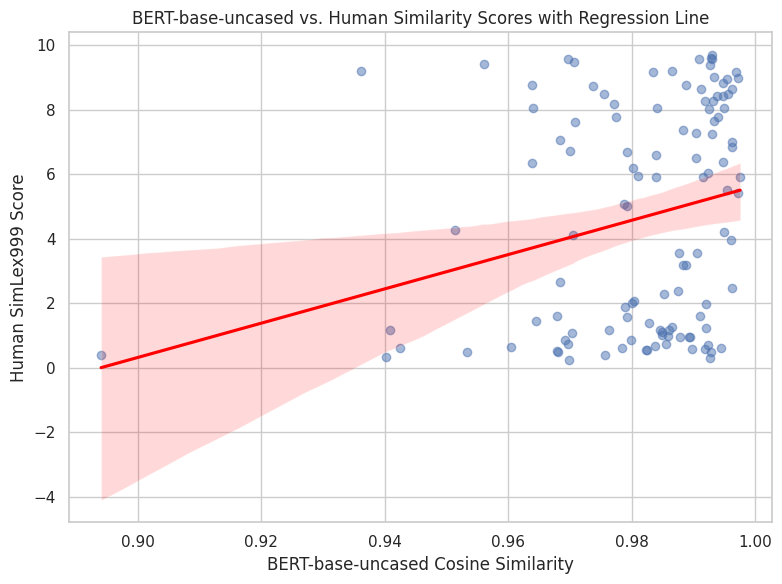

In [46]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Using device: {device}")

bert_model_name = 'bert-base-uncased'
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
bert_model = AutoModel.from_pretrained(bert_model_name)
bert_model.to(device)
bert_model.eval()  # Set model to evaluation mode


def get_embedding(text, tokenizer, model, device, max_length=128):
    with torch.no_grad():
        # Tokenize the input text
        encoded_input = tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        )
        # Move tensors to the specified device
        encoded_input = {key: val.to(device) for key, val in encoded_input.items()}

        # Forward pass through BERT
        output = model(**encoded_input)

        # Get the embeddings from the [CLS] token
        cls_embedding = output.last_hidden_state[:, 0, :]  # Shape: (1, hidden_size)

        # Move embedding to CPU and convert to numpy
        embedding = cls_embedding.squeeze().cpu().numpy()

    return embedding


# Initialize lists to store embeddings
context1_embeddings = []
context2_embeddings = []

print("Generating embeddings for context1...")
for text in tqdm(simlex_df['context1'], desc="Context1"):
    embedding = get_embedding(text, bert_tokenizer, bert_model, device)
    context1_embeddings.append(embedding)

print("Generating embeddings for context2...")
for text in tqdm(simlex_df['context2'], desc="Context2"):
    embedding = get_embedding(text, bert_tokenizer, bert_model, device)
    context2_embeddings.append(embedding)


print("Computing cosine similarities...")
# Convert lists to numpy arrays
context1_embeddings = np.array(context1_embeddings)  # Shape: (115, hidden_size)
context2_embeddings = np.array(context2_embeddings)  # Shape: (115, hidden_size)

# Compute cosine similarity for each pair
similarity_scores = []
for emb1, emb2 in tqdm(zip(context1_embeddings, context2_embeddings), total=len(context1_embeddings), desc="Similarity"):
    # Reshape for sklearn's cosine_similarity
    emb1 = emb1.reshape(1, -1)
    emb2 = emb2.reshape(1, -1)
    similarity = cosine_similarity(emb1, emb2)[0][0]
    similarity_scores.append(similarity)

simlex_df['BERT_Similarity'] = similarity_scores


from scipy.stats import pearsonr, spearmanr

# Ensure 'Human_Score' exists and is numeric
if 'SimLex999' not in simlex_df.columns:
    raise ValueError("The DataFrame must contain a 'SimLex999' column.")

# Compute Pearson correlation
pearson_corr, pearson_p = pearsonr(simlex_df['BERT_Similarity'], simlex_df['SimLex999'])
print(f"Pearson Correlation: {pearson_corr:.4f} (p-value: {pearson_p:.4e})")

# Compute Spearman correlation
spearman_corr, spearman_p = spearmanr(simlex_df['BERT_Similarity'], simlex_df['SimLex999'])
print(f"Spearman Correlation: {spearman_corr:.4f} (p-value: {spearman_p:.4e})")

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Define model name for labeling
model_name = 'BERT-base-uncased'

# Create the regression plot
plt.figure(figsize=(8, 6))
sns.regplot(
    x='BERT_Similarity',
    y='SimLex999',
    data=simlex_df,
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'red'}
)
plt.xlabel(f'{model_name} Cosine Similarity')
plt.ylabel('Human SimLex999 Score')
plt.title(f'{model_name} vs. Human Similarity Scores with Regression Line')
plt.grid(True)
plt.tight_layout()
plt.show()



In [2]:
import numpy as np
import pandas as pd

In [4]:
simlex_df = pd.read_csv('simlex_bert.csv')

added context eval for roberta

In [5]:
simlex_df

,Unnamed: 0,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex),context1,context2
0,0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41,This house has an old design,This house has a new design
1,1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67,She is a smart student.,She is an intelligent student.
2,2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19,The exam was hard,The exam was difficult
3,3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18,She felt happy walking through the garden.,She felt cheerful walking through the garden.
4,4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93,This puzzle is hard,This puzzle is easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,110,dirty,narrow,A,0.30,4.23,3.04,2,0.00,0,0.89,the alley was dirty,the alley was narrow
111,111,wife,husband,N,2.30,4.13,4.11,3,8.85,1,0.84,The wife is baking a cake in the kitchen.,The husband is baking a cake in the kitchen.
112,112,book,text,N,6.35,4.90,4.93,4,8.81,1,1.43,She picked up a book to read before bed.,She picked up a text to read before bed.
113,113,groom,bride,N,3.17,4.54,4.63,3,8.65,1,0.68,the groom was waiting at the altar,the bride was waiting at the altar


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Spearman Correlation: 0.4344
P-value: 1.2338e-06


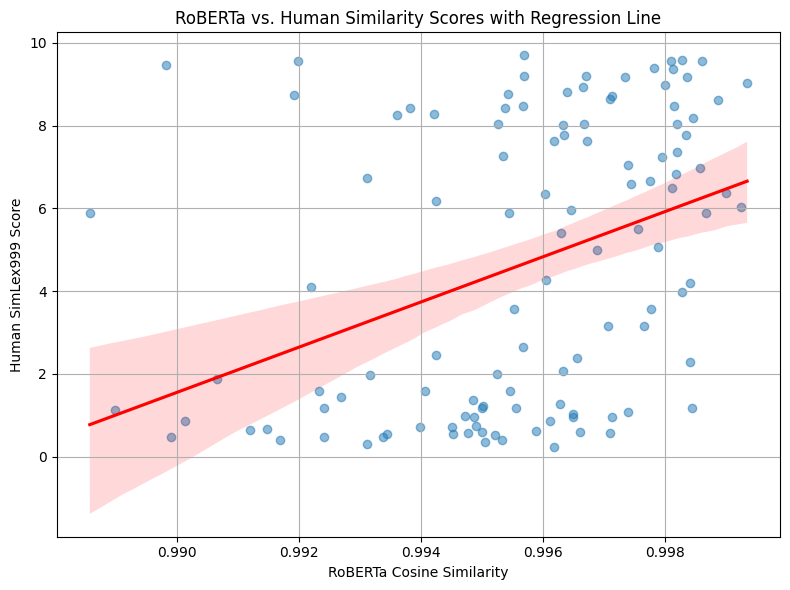

                                       context1  \
0                  This house has an old design   
1                       She is a smart student.   
2                             The exam was hard   
3    She felt happy walking through the garden.   
4                           This puzzle is hard   
..                                          ...   
110                         the alley was dirty   
111   The wife is baking a cake in the kitchen.   
112    She picked up a book to read before bed.   
113          the groom was waiting at the altar   
114                 The sky looks calm at night   

                                          context2  ROBERTA_Similarity  \
0                      This house has a new design            0.994061   
1                   She is an intelligent student.            0.995691   
2                           The exam was difficult            0.995436   
3    She felt cheerful walking through the garden.            0.998107   
4                

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import cosine_similarity


model_name = 'roberta-base'
model = SentenceTransformer(model_name)

contexts = pd.concat([simlex_df['context1'], simlex_df['context2']]).unique()
embeddings = model.encode(contexts, convert_to_tensor=False, show_progress_bar=True)

# Create a mapping from context to embedding
context_to_embedding = {context: embedding for context, embedding in zip(contexts, embeddings)}

# Add embeddings to the DataFrame
simlex_df['embedding1'] = simlex_df['context1'].map(context_to_embedding)
simlex_df['embedding2'] = simlex_df['context2'].map(context_to_embedding)

def compute_cosine_similarity(row):
    emb1 = row['embedding1']
    emb2 = row['embedding2']
    similarity = cosine_similarity([emb1], [emb2])[0][0]
    return similarity

simlex_df['ROBERTA_Similarity'] = simlex_df.apply(compute_cosine_similarity, axis=1)

spearman_corr, spearman_p = spearmanr(simlex_df['ROBERTA_Similarity'], simlex_df['SimLex999'])

print(f"Spearman Correlation: {spearman_corr:.4f}")
print(f"P-value: {spearman_p:.4e}")

plt.figure(figsize=(8, 6))
sns.regplot(
    x='ROBERTA_Similarity',
    y='SimLex999',
    data=simlex_df,
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'red'}
)
plt.xlabel('RoBERTa Cosine Similarity')
plt.ylabel('Human SimLex999 Score')
plt.title('RoBERTa vs. Human Similarity Scores with Regression Line')
plt.grid(True)
plt.tight_layout()
plt.show()

print(simlex_df[['context1', 'context2', 'ROBERTA_Similarity', 'SimLex999']])
